In [58]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
from datetime import datetime, timedelta

In [48]:
# The border of the plot
start_time = datetime(2016, 11, 3, 6, 0)
end_time = datetime(2016, 11, 7, 17, 0) 

In [49]:
# Read hourly failure rate
df_hourlyFailureRate = pd.read_csv('visualizeHourlyFailureRate.csv', names=['Time', 'FailureRate'], parse_dates=['Time'])
# print(df_hourlyFailureRate.dtypes)
df_hourlyFailureRate = df_hourlyFailureRate[(df_hourlyFailureRate['Time'] >= start_time) & (df_hourlyFailureRate['Time'] <= end_time)]
y_f = df_hourlyFailureRate.FailureRate.values   
dates = df_hourlyFailureRate.Time.values

In [50]:
# Read energy price
df_energyPrice = pd.read_csv('energyPrice.csv', parse_dates=['Date'])
# print(df_energyPrice.dtypes)
df_energyPrice = df_energyPrice[(df_energyPrice['Date'] >= start_time) & (df_energyPrice['Date'] <= end_time)]
y_e = df_energyPrice.Euro.values

In [51]:
# Read original records
df_originalRecords = pd.read_csv("originalRecords.csv", names=['ID', 'Start', 'End', 'DurationJob'], parse_dates=['Start', 'End'])
df_originalRecords['DurationAll'] = (df_originalRecords['End'] - df_originalRecords['Start']) / timedelta(hours=1)
df_originalRecords['LeftAll'] = (df_originalRecords['Start'] - start_time) / timedelta(hours=1)

In [52]:
# Read execution records
df_executionRecords = pd.read_csv("executionRecords.csv", names=['ID', 'Start', 'End', 'DurationJob'], parse_dates=['Start', 'End'])
df_executionRecords['DurationAll'] = (df_executionRecords['End'] - df_executionRecords['Start']) / timedelta(hours=1)
df_executionRecords['LeftAll'] = (df_executionRecords['Start'] - start_time) / timedelta(hours=1)
C = df_executionRecords.ID.values

In [54]:
# Read down duration periods
df_downDurationRecords = pd.read_csv("downDurationRecords.csv", names=['DownID', 'Start', 'End'], parse_dates=['Start', 'End'])
df_downDurationRecords['Duration'] = (df_downDurationRecords['End'] - df_downDurationRecords['Start']) / timedelta(hours=1)
df_downDurationRecords['Left'] = (df_downDurationRecords['Start'] - start_time) / timedelta(hours=1)
D = len(df_downDurationRecords)

In [55]:
# Start plot process, retrieve useful data
l0 = df_downDurationRecords.Left.values
p0 = df_downDurationRecords.Duration.values
l1 = df_originalRecords.LeftAll.values
p1 = df_originalRecords.DurationAll.values
l2 = df_executionRecords.LeftAll.values
p2 = df_executionRecords.DurationAll.values
x = []
for d in dates:
    ts = pd.to_datetime(str(d))
    d = ts.strftime('%Y-%m-%d %H:%M:%S')
    x.append(d)

[]

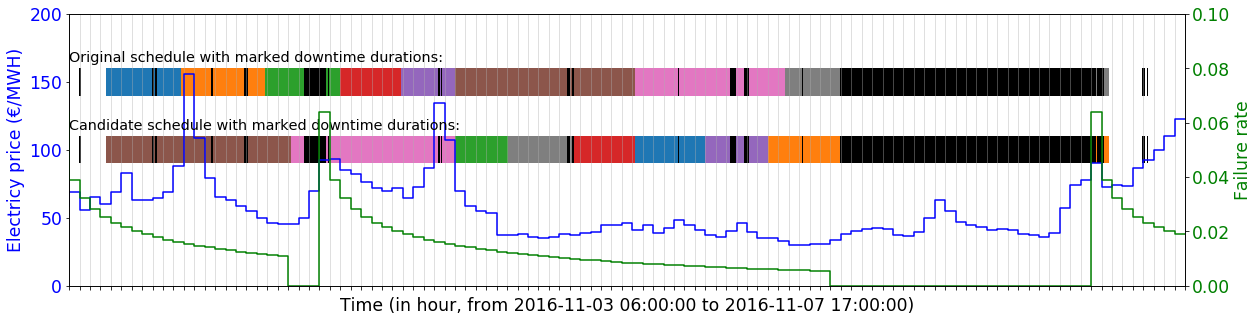

In [59]:
fig, ax1 = plt.subplots()
color = 'b'
ax1.step(x, y_e, color)
ax1.set_ylabel('Electricy price (€/MWH)', color=color)
ax1.set_xlabel('Time (in hour, from 2016-11-03 06:00:00 to 2016-11-07 17:00:00)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='x', alpha=0.5)
ax1.set_xlim('2016-11-03 06:00:00', '2016-11-07 17:00:00')
ax1.set_ylim(0, 200)
ax1.set_xticklabels([])

for i in range(0, 8):
    plt.barh(150, p1[i], height=20, left=l1[i], color='C%d' % i)
    
for i in range(0, D):
    plt.barh(150, p0[i], height=20, left=l0[i], color='black')

for i in range(0, 8):
    plt.barh(100, p2[i], height=20, left=l2[i], color='C%d' % (C[i] - 510))
    
for i in range(0, D):
    plt.barh(100, p0[i], height=20, left=l0[i], color='black')
    
plt.text(0, 165, 'Original schedule with marked downtime durations:', fontsize='x-large')
plt.text(0, 115, 'Candidate schedule with marked downtime durations:', fontsize='x-large')

ax2 = ax1.twinx()
color = 'g'
ax2.step(x, y_f, color)
ax2.set_ylabel('Failure rate', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim('2016-11-03 06:00:00', '2016-11-07 17:00:00')
ax2.set_ylim(0, 0.1)
ax2.set_xticklabels([])

# plt.savefig("result.png", format="png")